In [13]:
import random
import math

import ipynb.fs.defs.Chapter4_LinearAlgebra as la


In [22]:

# Fudge for creating data to work along...
num_friends = [random.randrange(0,100) for _ in range(204)]
daily_minutes = [random.randrange(0,60) for _ in range(204)]

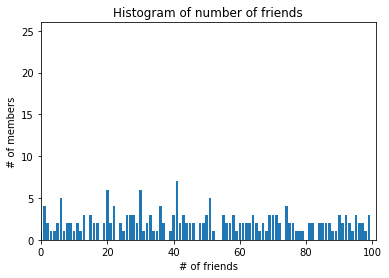

In [3]:
from matplotlib import pyplot as plt

from collections import Counter

friend_counts = Counter(num_friends)
xs = range(101)        # max value is 100
ys = [friend_counts[x] for x in xs]   # number of friends as height
plt.bar(xs, ys)
plt.axis([0,101,0,26])
plt.title("Histogram of number of friends")
plt.xlabel("# of friends")
plt.ylabel("# of members")
plt.show()

In [4]:
num_points = len(num_friends)
print(num_points)

largest_value = max(num_friends)
print(largest_value)

smallest_value = min(num_friends)
print(smallest_value)

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest = sorted_values[1]
second_largest = sorted_values[-2]

print(smallest_value,second_smallest,second_largest)

204
99
0
0 1 99


# Central Tendencies

In [5]:
def mean(x):
    return sum(x) / len(x)

mean(num_friends)

47.872549019607845

In [6]:
def median(x):
    """ find the middle-most value of x
    """
    n = len(x)
    sorted_x = sorted(x)
    midpoint = n // 2
    
    if n %2 ==1:
        # odd- just return the middle value
        return sorted_x[midpoint]
    else:
        # even- return the average of the middle two values
        lo = midpoint-1
        hi = midpoint
        return (sorted_x[lo] + sorted_x[hi]) / 2
    

median(num_friends)

45.0

Note that the mean is easier to compute than the median and it varies smoothly as the data changes. 

If we have n data points, and one of them increases by a small amount e, the mean will increase by e / n. This opens up the possibility of clever calculus tricks. 

For the median, the small change of e may increase the median by e, a number less than e, or not at all.

However, the mean is very sensitibve to outliers, so can sometimes give a misleading picture. 

A generalisation of the median is the quantile, which represents the value less than which a certain percentile lies. 

In [7]:
# Calculate a quantile.
def quantile(x, p):
    """ return the p-th percentile value in x"""
    
    p_index = int(p * len(x))
    return sorted(x)[p_index]

quantile(num_friends, 0.90)

90

In [8]:
# Mode- the most common value. 
def mode(x):
    """ returns a list- may be more than one most common value"""
    counts = Counter(x)
    max_count = max(counts.values())
    
    return [x_i for x_i, count in counts.items() 
                if count == max_count]

mode(num_friends)
    

[41]

In [10]:
# difference between laregst and smallest - range. 

def data_range(x):
    return max(x) - min(x)


data_range(num_friends)

99

Note that the range is 0 when max and min are the same, meaning that all the points in the dataset are the same. 

In [15]:
def de_mean(x):
    """ translate x by subtracting its mean (so the result has a mean of 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """ assumes x has at least two elements... 
        Note that this returns variance as number of unit, squared. 
    """
    n = len(x)
    deviations = de_mean(x)
    return la.sum_of_squares(deviations) / (n - 1)

variance(num_friends)

807.8063363276345

In [18]:
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

28.421934070848074

In [20]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

46

# Correlation

Variance measures how a single variable deviates from the mean. 
Covariance measures how two variables vary in tandem from their means. 

The dot sums up the product of corresponding paris of elements. When X and Y are above their means toegther or below their means together, we get a positive value. When one or the other but not both are above their mean, we get a negative value. 

So, a positive covariance means one is large when the other is large. A negative covariance means ex is small when y is large and vice versa. A covariance close to 0 means no relationship exists. 

The units are the product of the units of the inputs. In the example below it's friends minutes per day. What does that equate to in real life? 
If every user had twice as many friends but the same number of online mnutes, the covariance would be twice as large. But, the variables would be just as interrelated- not twice as interrelated. So- it's difficult to say what counts as a large covariance. 



In [23]:
def covariance(x,y):
    n = len(x)
    return la.dot(de_mean(x), de_mean(y)) / (n -1)

covariance(num_friends, daily_minutes)

-41.215493093789256

Easier to use correlation. 

Correlation values lie between -1 (perfect negaive correlation) and 1 (perfect correlation). A value close to zero means there is no correlation. 

Note that a correlation of 0 doesn't mean there is not a relationship between the two variables. Consider: 

x = [-2, -1, 0, 1, 2]

y = [ 2, 1, 0, 1, 2]

In this case, abs(x_i) == abs(y_i). 

Correlation also tells you nothing about the size of the relationship. The variables: 

x = [-2, -1, 0, 1, 2]

y = [99.98, 99.99, 100, 100.01, 100.02] 

are perfectly correlated, but (depending on what you’re measuring) it’s quite possible that this relationship isn’t all that interesting.


In [24]:
def correlation(x,y):
    stddev_x = standard_deviation(x)
    stddev_y = standard_deviation(y)
    
    if stddev_x > 0 and stddev_y > 0: 
        return covariance(x,y) / stddev_x / stddev_y
    else:
        return 0         # if there's no variation, correlation is 0. 
    
correlation(num_friends, daily_minutes)

-0.08341279434636317

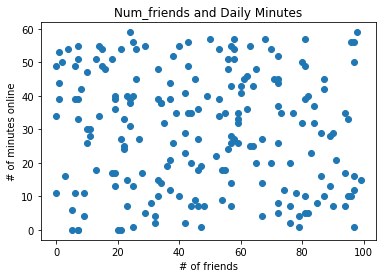

In [25]:
plt.scatter(num_friends, daily_minutes)
plt.title("Num_friends and Daily Minutes")
plt.xlabel("# of friends")
plt.ylabel("# of minutes online")
plt.show()

# Simpson's Paradox

Correlation measures the relationship between two datasets where ALL ELSE IS EQUAL. For some scenarios, all else being equal is a valid assumption to make. However, sometimes, deeper patterns to relationships between data mean that this assumption no longer holds- and it can be difficult to investigate. 



Also noting that correlation and causation are not the same thing. 